In [1]:
from fill_hole_funcs import *

import cv2 # Import the OpenCV library
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

In [3]:
# single file test
myfile = 'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\test_hole.png'

In [ ]:
images_dir = 'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\images'
list_files, list_filesName = img_holes(myfile).list_files( path=images_dir, exclude_masks='yes')



In [4]:
def load_weight_conf(jsonPath):
    """
    load the weight configuration file from a JSON file
    input: JSON file full path
    output: dictionary with all configurations
    """
    import json
    f = open(jsonPath)
    weight_conf = json.load(f)
    return(weight_conf)

In [5]:
# load image & mask image
image, mask = files_handler(myfile).load_image_return_array()

the file c:\gitHub\Learning_and_Training\filling_holes_in_images\mask_test_hole.png was loaded


In [6]:
# get the boudary coordinates using contour detection
b_coords = img_holes(img = image).boundaryDetect8(mask)

# get hole coordinates (x,y)
xy_coords = np.flip(np.column_stack(np.where(mask > 0)), axis=1)

# load the weight configuration data
jsonPath="weight_conf.json"
weight_conf = load_weight_conf(jsonPath)

# fill the hole 
newImage =  img_holes(img = image).fillHole(b_coords = b_coords, xy_coords=xy_coords, weightFunc= img_holes(myfile).defaultWeight_func, **weight_conf)

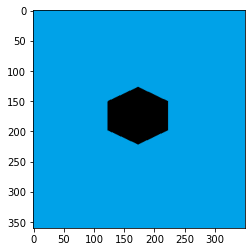

In [7]:
# show results
plt.imshow(cv2.cvtColor(newImage, cv2.COLOR_BGR2RGB))